<font color= 'green'>HOUSE PRICE PREDICTION WITH LINEAR REGRESSION'</font>


In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [194]:
df = pd.read_csv(r"C:\Users\Delll\Documents\data\train.csv")

In [195]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [196]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

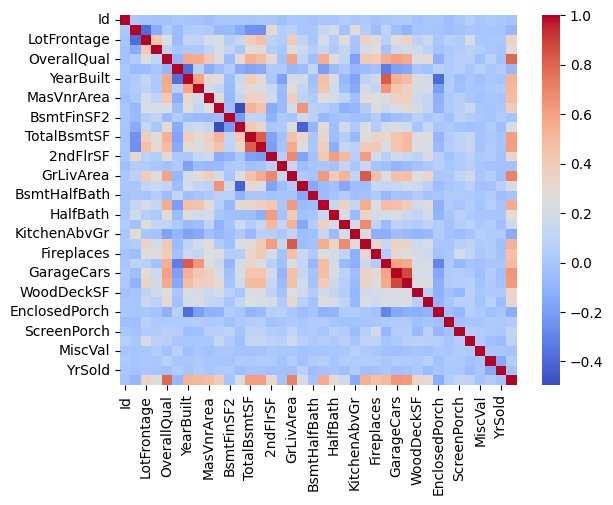

In [197]:
#viewing correlation with heatmap
#Correlation heatmap between the variables
corr = df.corr()

sns.heatmap(corr, cmap="coolwarm", fmt='.2f')
plt.show()

In [198]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [199]:
df = df.drop(['MSSubClass', 'MSZoning', 'LotFrontage', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'], axis=1)

In [200]:
df.nunique()

Id              1460
LotArea         1073
BsmtFullBath       4
BsmtHalfBath       3
FullBath           4
HalfBath           3
BedroomAbvGr       8
SalePrice        663
dtype: int64

In [201]:
df

,Id,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
0,1,8450,1,0,2,1,3,208500
1,2,9600,0,1,2,0,3,181500
2,3,11250,1,0,2,1,3,223500
3,4,9550,1,0,1,0,3,140000
4,5,14260,1,0,2,1,4,250000
...,...,...,...,...,...,...,...,...
1455,1456,7917,0,0,2,1,3,175000
1456,1457,13175,1,0,2,0,3,210000
1457,1458,9042,0,0,2,0,4,266500
1458,1459,9717,1,0,1,0,2,142125


In [202]:
df.dtypes

Id              int64
LotArea         int64
BsmtFullBath    int64
BsmtHalfBath    int64
FullBath        int64
HalfBath        int64
BedroomAbvGr    int64
SalePrice       int64
dtype: object

In [203]:
df['Bathroom'] = df['BsmtFullBath'] + df['BsmtHalfBath']	+df['FullBath']	+ df['HalfBath']

#or df['Bathroom'] = df[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']].sum(axis=1)

In [204]:
df = df.drop(['BsmtFullBath',	'BsmtHalfBath',	'FullBath',	'HalfBath'], axis=1)

In [205]:
df = df.rename(columns= {'LotArea' : 'Square_foot', 'BedroomAbvGr' : 'Bedroom'})

In [206]:
df.set_index('Id', inplace = True)
df

,Square_foot,Bedroom,SalePrice,Bathroom
Id,,,,
1,8450,3,208500,4
2,9600,3,181500,3
3,11250,3,223500,4
4,9550,3,140000,2
5,14260,4,250000,4
...,...,...,...,...
1456,7917,3,175000,3
1457,13175,3,210000,3
1458,9042,4,266500,2


In [207]:
df.isnull().sum()

Square_foot    0
Bedroom        0
SalePrice      0
Bathroom       0
dtype: int64

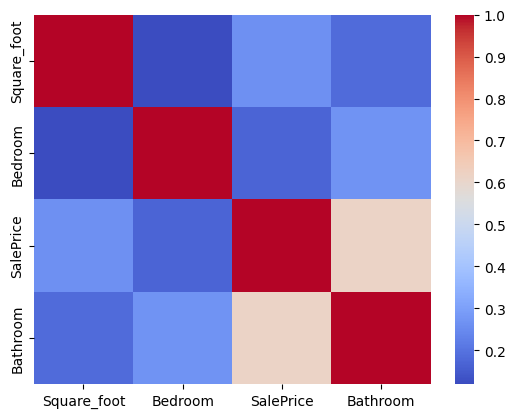

In [208]:
#viewing correlation with heatmap
#Correlation heatmap between the variables
corr = df.corr()

sns.heatmap(corr, cmap="coolwarm", fmt='.2f')
plt.show()

In [209]:
# Calculate the correlation matrix
corr_matrix = df.corr().unstack().sort_values().drop_duplicates()
# Display the correlation matrix
print(corr_matrix)

Square_foot  Bedroom        0.119690
Bedroom      SalePrice      0.168213
Square_foot  Bathroom       0.184407
             SalePrice      0.263843
Bedroom      Bathroom       0.267732
SalePrice    Bathroom       0.613005
Square_foot  Square_foot    1.000000
dtype: float64


<AxesSubplot: >

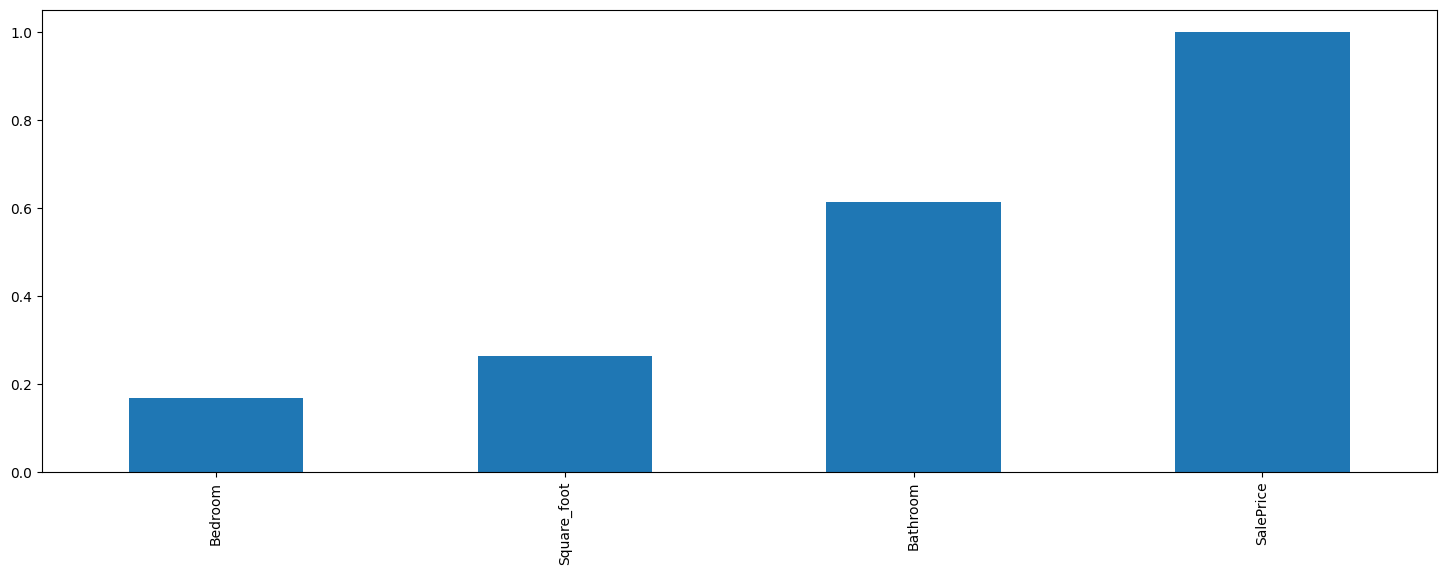

In [210]:
#Let's find the correlation between the independent and the dependent feature
df.corr()['SalePrice'].sort_values().plot(kind='bar', figsize=(18, 6))

In [211]:
#importing test dataset
df_test = pd.read_csv(r"C:\Users\Delll\Documents\data\test.csv")

In [212]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [213]:
df_test = df_test.drop(['MSSubClass', 'MSZoning', 'LotFrontage', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'], axis=1)

In [214]:
df_test['Bathroom'] = df_test['BsmtFullBath'] + df_test['BsmtHalfBath']	+df_test['FullBath']	+ df_test['HalfBath']
df_test = df_test.drop(['BsmtFullBath',	'BsmtHalfBath',	'FullBath',	'HalfBath'], axis=1)
df_test = df_test.rename(columns= {'LotArea' : 'Square_foot', 'BedroomAbvGr' : 'Bedroom'})
df_test.set_index('Id', inplace = True)

In [215]:
df_test.head()

,Square_foot,Bedroom,Bathroom
Id,,,
1461,11622,2,1.0
1462,14267,3,2.0
1463,13830,3,3.0
1464,9978,3,3.0
1465,5005,2,2.0


In [216]:
print(df_test['Bathroom'].unique())

[ 1.  2.  3.  4.  6.  5.  8. nan]


In [217]:
df_test['Bathroom'] = df_test['Bathroom'].replace('nan', np.nan)
df_test['Bathroom'] = df_test['Bathroom'].fillna(df['Bathroom'].mean())

In [218]:
df_test.isna().sum()

Square_foot    0
Bedroom        0
Bathroom       0
dtype: int64

In [219]:
df_copy = df.copy()
df_testcopy = df_test.copy()

In [220]:
from sklearn.preprocessing import LabelEncoder
#iterate through the column and encode each one 
label_encoder = LabelEncoder()
for column in df_copy.select_dtypes(include=['object']):
    df_copy[column] =label_encoder.fit_transform(df_copy[column])
for column in df_testcopy.select_dtypes(include=['object']):
    df_testcopy[column] =label_encoder.fit_transform(df_testcopy[column])

In [221]:
#splitting the training set into X ad y
X_train = df_copy.drop(["SalePrice"], axis=1)
y_train = df_copy.SalePrice
X_test = df_testcopy

In [222]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [223]:
model = LinearRegression().fit(X_train, y_train)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [224]:
y_pred

array([110720.49458386, 163758.12765069, 213679.30172138, ...,
       170179.91823081, 158987.77735258, 208438.89861031])

In [225]:
# Evaluate model
mse_score = make_scorer(mean_squared_error)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring = mse_score)
print(f'Mean MSE across folds: {cv_scores.mean()}')

Mean MSE across folds: 3917468872.350371


In [226]:
rmse = np.sqrt(3917468872.350371)
rmse

62589.68662927121

The rmse indicates that there is an error of around $62, 589 in the actual price to predicted price. 